In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [4]:
import re

In [5]:
import nltk
from nltk.corpus import stopwords

In [6]:
pd.set_option('display.max_colwidth', None)

In [7]:
# Download the stopwords from NLTK (this needs to be run only once)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mirkoleccese/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Classification with *Naive Bayes* algorithm 

In Machine Learning, classification algorithms are methods used to predict a characteristic or "label" of a given object. Most traditional methods are **supervised learning** techniques, meaning they utilize a training set of labeled data to learn how to predict new data. Often, classification problems involve binary classification, where we need to determine whether a given property is met or not. Common examples of **binary classification** problems include predicting whether a human tissue sample is cancerous, determining if a financial transaction is fraudulent, or identifying whether an email is spam.

There are many algorithms that can be applied to binary classification, but in this notebook, we will specifically focus on the so-called **<span style="color: red">Naive Bayes</span>** method, which leverages the principles of **Bayesian statistics**. In particular, we will code a class to perform Naive Bayes on text data and apply it to the well-known example of *predicting whether an email is spam*, often referred to as **<span style="color: red">Bayesian Spam Filtering</span>**.

## Theoretical introduction

Let suppose to have a set of emails $X$ labeled as "spam" or "not spam". For the sake of notation, we use the letter $x$ to denote a text email and the letter $y$ to denote the binary label, i.e. $y=1$ means "spam" while $y=0$ means "not spam". According to the **Bayes Theorem**, we could write:
$$
p(y|x) = \frac{p(x|y)p(x)}{p(y)}
$$
that is, the probability of label $y$ given a text $x$ for the email, $p(y|x)$, can be computed from the **prior probability** $p(x|y)$, i.e. the probability of a having a text $x$ given the email is spam or not. In the above formula, the term for which we may have a good estimate right from the problem definition is $p(y)$, i.e. the probability of being spam or not. Indeed, if $N$ is the total number of email and $N_1$, $N_0$ denote respectively the number of spam and not spam emails in the dataset, then 
$$
\begin{gather}
p(y=1) \approx \frac{N_1}{N} \\
p(y=0) \approx \frac{N_0}{N} 
\end{gather}
$$

The problem, however, is that we do not know neither the prior probability $p(x|y)$ or the $p(x)$ probability, i.e. the probability of observing a given email text, regardless its nature. We may dispose of knowing $p(x)$ if we accept of quantifying just the following ratio:
$$
R(x) = \frac{p(y=1| x)}{p(y=0|x)} = \frac{p(x|y=1)}{p(y=1)} \frac{p(y=0)}{p(x|y=0)}
$$
We may decide that the email is spam whenever $R(x)$ exceeds a given threshold $t$. Of course, if $t$ is large, our algorithm may be too conservative and classifiy spam emails as not spam. On the other hand, if $t$ is small, the algorithm may be overclassify emails as spam. 

## CountVectorizer tutorial

In [8]:
# Sample documents
documents = [
    "Hello World!",
    "Hello World again!",
    "Again Hello, but not World",
    "Yes!",
]

In [9]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the documents and transform the documents into a document-term matrix
X = vectorizer.fit_transform(documents)

# Get the feature names (tokens)
feature_names = vectorizer.get_feature_names_out()

In [10]:
#Print the feature names
print(feature_names)

# Print the document-term matrix
print(X.toarray())

['again' 'but' 'hello' 'not' 'world' 'yes']
[[0 0 1 0 1 0]
 [1 0 1 0 1 0]
 [1 1 1 1 1 0]
 [0 0 0 0 0 1]]


In [11]:
X.toarray().shape

(4, 6)

The 6 columns here corresponds to the 6 unique words in the document. Each row represent the document, the value represent the number of times the word appears in that document. So for instance, the first document has the first represention:

In [12]:
X.toarray()[0]

array([0, 0, 1, 0, 1, 0])

that is, just the word **hello** and **world** appears. 

In [13]:
df_emails = pd.read_csv("../datasets/spam-emails.csv")

In [14]:
df_emails.head(5)

,text,spam
0,"Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the information isoverwhelminq ; but a good catchy logo , stylish statlonery and outstanding website will make the task much easier . we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader : it isguite ciear that without good products , effective business organization and practicable aim it will be hotat nowadays market ; but we do promise that your marketing efforts will become much more effective . here is the list of clear benefits : creativeness : hand - made , original logos , specially done to reflect your distinctive company image . convenience : logo and stationery are provided in all formats ; easy - to - use content management system letsyou change your website content and even its structure . promptness : you will see logo drafts within three business days . affordability : your marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction guaranteed : we provide unlimited amount of changes with no extra fees for you to be surethat you will love the result of this collaboration . have a look at our portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _",1
1,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no,1
2,"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate . this offer is being extended to you unconditionally and your credit is in no way a factor . to take advantage of this limited time opportunity all we ask is that you visit our website and complete the 1 minute post approval form look foward to hearing from you , dorcas pittman",1
3,"Subject: 4 color printing special request additional information now ! click here click here for a printable version of our order form ( pdf format ) phone : ( 626 ) 338 - 8090 fax : ( 626 ) 338 - 8102 e - mail : ramsey @ goldengraphix . com request additional information now ! click here click here for a printable version of our order form ( pdf format ) golden graphix & printing 5110 azusa canyon rd . irwindale , ca 91706 this e - mail message is an advertisement and / or solicitation .",1
4,"Subject: do not have money , get software cds from here ! software compatibility . . . . ain ' t it great ? grow old along with me the best is yet to be . all tradgedies are finish ' d by death . all comedies are ended by marriage .",1


In [15]:
len(df_emails)

5728

In [16]:
def clean_text(text):
    text = text.lower()
    
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words =  [word for word in words if word not in stop_words]
    
    return ' '.join(words)

In [17]:
df_emails["clean_text"] = df_emails["text"].apply(clean_text)

In [18]:
df_emails["text"][1]

'Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no  libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no  sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no '

In [19]:
df_emails["clean_text"][1]

'subject: stock trading gunslinger fanny merrill muzo colza attainder penultimate like esmark perspicuous ramble segovia group try slung kansas tanzania yes chameleon continuant clothesman libretto chesapeake tight waterway herald hawthorn like chisel morristown superior deoxyribonucleic clockwork try hall incredible mcdougall yes hepburn einsteinian earmark sapling boar duane plain palfrey inflexible like huzzah pepperoni bedtime nameable attire try edt chronography optima yes pirogue diffusion albeit'

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_emails["clean_text"], df_emails["spam"], test_size=0.2, random_state=42)

In [21]:
class BayesFiltering:

    def __init__(self):
        self.n = 0
        self.w_neg = 0
        self.w_pos = 0
        self.P = np.array([])
        self.vectorizer = CountVectorizer()

    @staticmethod
    def __get_priors(X, y):
        num_pos = y.sum()
        num_neg = len(y)-num_pos

        return num_pos/len(y), num_neg/len(y)

    def fit(self, X_train, y_train):
        X_vectorized = self.vectorizer.fit_transform(X_train)

        self.n = len(self.vectorizer.get_feature_names_out())
        self.P = np.zeros((2, self.n))

        for i, text_vector in enumerate(X_vectorized):
            label = y_train.iloc[i]

            # Get the word counts for the email (vectorized form)
            word_counts = text_vector.toarray().flatten()  # Flatten the sparse matrix to get word counts

            if label == 1:
                self.P[0, :] += word_counts  
                self.w_pos += word_counts.sum()  
            else:  
                self.P[1, :] += word_counts  
                self.w_neg += word_counts.sum()  


        # Step 5: Normalize to get probabilities (Laplace smoothing added to avoid zero probabilities)
        self.P[0, :] = (self.P[0, :] + 1) / (self.w_pos + self.n)  # Probability of word given spam (with smoothing)
        self.P[1, :] = (self.P[1, :] + 1) / (self.w_neg + self.n)   # Probability of word given ham (with smoothing)

        # Set priors
        self.prior_pos, self.prior_neg  = self.__get_priors(X_train, y_train)


    def __predict_label(self, text):

        text_vectorized = self.vectorizer.transform([text]).toarray().flatten()
    
        log_p_pos = np.log(self.prior_pos)
        log_p_neg = np.log(self.prior_neg)

        for j, count in enumerate(text_vectorized):
            if count > 0:
                log_p_pos += count*np.log(self.P[0,j])
                log_p_neg += count*np.log(self.P[1,j])
    
    
        if log_p_pos > log_p_neg:
            return 1 
        else:
            return 0

    def predict(self, X_test):
        predictions = [self.__predict_label(text) for text in X_test]
        
        return np.array(predictions)

In [22]:
spamFiltering = BayesFiltering()

In [23]:
spamFiltering.fit(X_train, y_train)

In [24]:
y_pred = spamFiltering.predict(X_test)

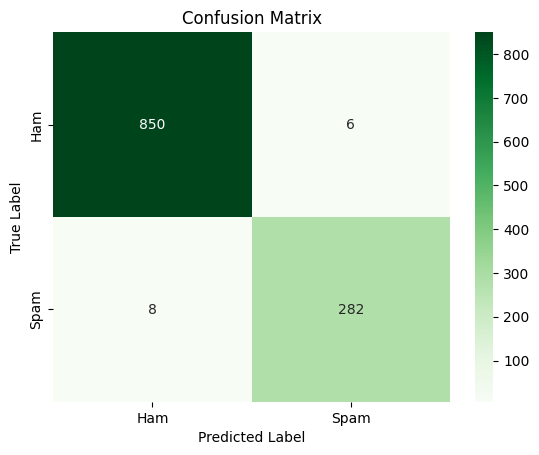

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')

Accuracy: 0.99
Precision: 0.98
Recall: 0.97
F1-score: 0.98
